In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\A\election2.csv')

In [3]:
data.columns

Index(['Candidate', 'Gender', 'Age', 'Caste', 'Party', 'Party Name', 'Symbol',
       'Total Vote', 'Percentage', 'Year', 'Constituency', 'District'],
      dtype='object')

In [4]:
columns_to_drop = ['Symbol']

In [5]:
data = data.drop(columns=columns_to_drop)

In [6]:
data = data.dropna()

In [7]:
data.head()

,Candidate,Gender,Age,Caste,Party,Party Name,Total Vote,Percentage,Year,Constituency,District
1,P T Parameshwaranaik,Male,48 yr,SC,INC,Indian National Congress,59336,51.11%,2013,Hadagalli,vijayanagar
2,P T Parameshwara Naik,Male,54 yr,SC,INC,Indian National Congress,54097,38.65%,2018,Hadagalli,vijayanagar
3,Odo Gangappa,Male,61 yr,SC,IND,Independent,44919,32.09%,2018,Hadagalli,vijayanagar
4,B Chandra Naik,Male,38 yr,SC,BJP,Bharatiya Janata Party,43992,48.27%,2008,Hadagalli,vijayanagar
5,P T Parameswara Naik,Male,45 yr,SC,INC,Indian National Congress,37474,41.12%,2008,Hadagalli,vijayanagar


In [8]:
data['Party']

1          INC
2          INC
3          IND
4          BJP
5          INC
         ...  
12890      INC
12891      BJP
12892    JD(S)
12893      KJP
12894      IND
Name: Party, Length: 5522, dtype: object

In [9]:
unique_parties = data['Party'].unique()
print(unique_parties)

['INC' 'IND' 'BJP' 'KJP' 'BSRCP' 'JD(S)' 'BSP' 'AIMEP' 'CPI(ML)(L)' 'ANC'
 'KPJP' 'JD(U)' 'SP' 'LJP' 'RAHS' 'BJC' 'NDEP' 'RSPS' 'NCP' 'CPI' 'SJPA'
 'SHS' 'SKP' 'INCP' 'BDBRAJP' 'RPI(A)' 'SAJP' 'SJPL' 'HND' 'PPRP' 'BMUP'
 'NAC' 'HJP' 'LSP' 'BBKD' 'KMP' 'JANSAMAP' 'RCMP' 'BRPP' 'WPOI' 'CPM'
 'PPOI' 'ABHM' 'AVIRP' 'KP' 'SDPI' 'AAAP' 'RPI' 'NPP' 'SUP' 'SWARAJ'
 'IUML' 'ASP' 'SUCI' 'AMJP' 'AIFB' 'KRRS' 'CPIM' 'KAP' 'BPJP' 'ABML(S)'
 'JSP' 'ABMSD' 'KCVP' 'RMVP' 'BHPP' 'FCI' 'KSRKP' 'SHP' 'INL' 'AIFB(S)'
 'VJCP' 'SBKP' 'AMKP' 'SK' 'AIUC' 'BPKP' 'ADMK' 'BRMSC' 'PRRJP' 'JAHP'
 'IJP' 'RPSN' 'RJBP' 'JBJSP' 'KaSP' 'SJKP' 'PRCP' 'PMPT' 'AKBRP' 'PBI'
 'PSS' 'BRPI']


In [10]:
data['Year'] = data['Year'].astype(int)

In [11]:
party = ['INC', 'BJP', 'JD(U)','BSP','JD(S)']
filtered_data = data[data['Party'].isin(party)]


In [12]:
start_year = 2003  # Replace 2003 with the desired start year
end_year = 2018  # Replace 2018 with the desired end year
filtered_data = filtered_data[(filtered_data['Year'] >= start_year) & (filtered_data['Year'] <= end_year)]

In [13]:
# Convert the 'Year' column to integer with error handling for non-numeric values
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

# Convert the 'Total Vote' column to numeric
data['Total Vote'] = pd.to_numeric(data['Total Vote'], errors='coerce')

# Filter the data for the years 2000 to 2018
filtered_df = data[(data['Year'] >= 2000) & (data['Year'] <= 2018)]

# Group the data by Year and Constituency and find the winner and runner-up in each year
yearly_results = filtered_df.groupby('Year').apply(lambda x: x.nlargest(2, 'Total Vote')).reset_index(drop=True)

# Display the winner and runner-up candidates in each year with their respective parties
for year, group in yearly_results.groupby('Year'):
    print(f"Year: {year}")
    print(f"Winner: {group.loc[group.index[0], 'Party']} ({group.loc[group.index[0], 'Party Name']})")
    print(f"Runner: {group.loc[group.index[1], 'Party']} ({group.loc[group.index[1], 'Party Name']})")
    print()

Year: 2004
Winner: INC (Indian National Congress)
Runner: BSP (Bahujan Samaj Party)

Year: 2008
Winner: BJP (Bharatiya Janata Party)
Runner: BJP (Bharatiya Janata Party)

Year: 2013
Winner: INC (Indian National Congress)
Runner: BJP (Bharatiya Janata Party)

Year: 2018
Winner: BJP (Bharatiya Janata Party)
Runner: INC (Indian National Congress)



In [14]:


# Perform analysis or further processing on the filtered dataset without considering the 'Age' column
# Example 1: Calculate the total votes received by the party in each year
total_votes_by_year = filtered_data.groupby('Year')['Total Vote'].sum()

# Example 2: Count the number of male and female candidates in each district
gender_counts_by_district = filtered_data.groupby('District')['Gender'].value_counts()
filtered_data['Percentage'] = filtered_data['Percentage'].astype(str)


filtered_data['Percentage'] = filtered_data['Percentage'].str.rstrip('%')
filtered_data['Percentage'] = pd.to_numeric(filtered_data['Percentage'], errors='coerce')
filtered_data['Total Vote'] = pd.to_numeric(filtered_data['Total Vote'], errors='coerce')

# Example 3: Calculate the percentage of votes received by the party in each constituency
percentage_votes_by_constituency = filtered_data.groupby('Constituency')['Percentage'].mean()

# Example 4: Identify the candidate with the highest number of votes in each year
top_candidate_by_year = filtered_data.groupby('Year').apply(lambda x: x.loc[x['Total Vote'].idxmax()])

# Display the results
print(total_votes_by_year)
print(gender_counts_by_district)
print(percentage_votes_by_constituency)
print(top_candidate_by_year)

top_candidate_by_year.to_excel('top_candidate_by_year.xlsx', index=False)

Year
2004                                        2918683742876
2008    4399237474313218535495008242216454033274242536...
2013    5933618526386111133809322847103471039499713912...
2018    5409728255832771735611411334076815761182213138...
Name: Total Vote, dtype: object
District         Gender
Bagalkot         Male      70
Bangalore        Male      11
                 Female     1
Bangalore rural  Male      46
                 Female     3
                           ..
vijayanagar      Male      47
                 Female     1
vijayanagara     Male      11
yadgir           Male      31
                 Female     1
Name: Gender, Length: 86, dtype: int64
Constituency
 Hadagalli        19.300000
Afzalpur          22.690000
Aland             17.833846
Arabhavi          25.327273
Arkalgud          21.894167
                    ...    
uttara kannada    20.896140
vijayanagara      23.767273
yadgir            22.410000
yelburga          24.164545
yemkanmardi       32.391667
Name: Percentage,

In [15]:
import os
print(os.getcwd())

C:\Users\A


In [16]:
unique_parties = filtered_data['Party'].unique()
print(unique_parties)


['INC' 'BJP' 'JD(S)' 'BSP' 'JD(U)']


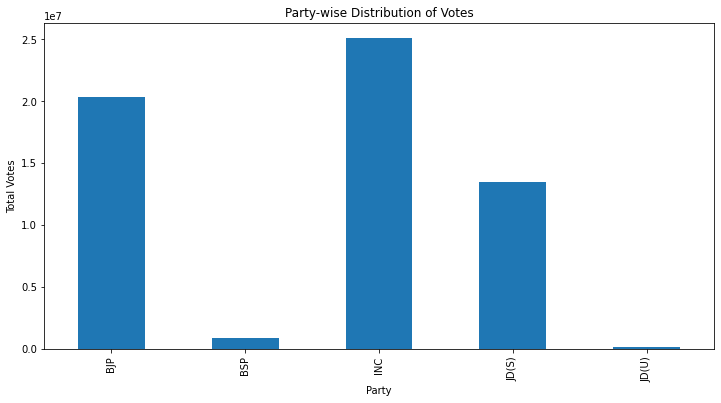

In [17]:
import matplotlib.pyplot as plt

# Group the data by party and calculate the total votes
party_votes = filtered_data.groupby('Party')['Total Vote'].sum()

# Plot a bar chart to visualize the party-wise distribution of votes
plt.figure(figsize=(12, 6))
party_votes.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.title('Party-wise Distribution of Votes')
plt.show()


In [19]:
import seaborn as sns

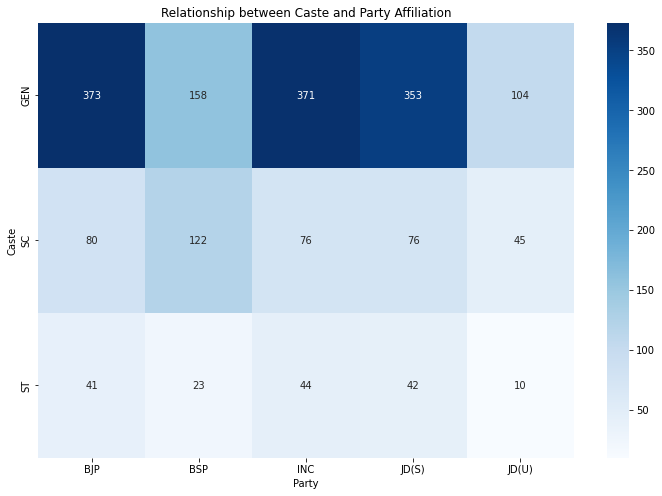

In [20]:
# Create a crosstab to analyze the count of caste within each party
caste_party_crosstab = pd.crosstab(filtered_data['Caste'], filtered_data['Party'])

# Plot a heatmap to visualize the relationship between caste and party affiliation
plt.figure(figsize=(12, 8))
sns.heatmap(caste_party_crosstab, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Party')
plt.ylabel('Caste')
plt.title('Relationship between Caste and Party Affiliation')
plt.show()


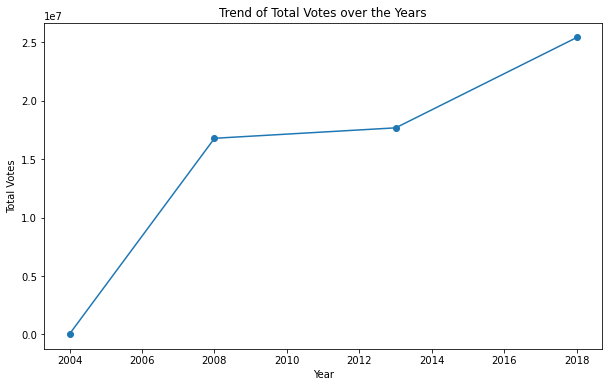

In [21]:
# Group the data by year and calculate the total votes
total_votes_by_year = filtered_data.groupby('Year')['Total Vote'].sum()

# Plot a line chart to visualize the trend of total votes over the years
plt.figure(figsize=(10, 6))
total_votes_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Trend of Total Votes over the Years')
plt.show()


In [22]:
# Get the count of each party affiliation
party_counts = data['Party'].value_counts()

# Display the top 10 most common party affiliations
top_10_parties = party_counts.head(10)
print(top_10_parties)


IND      2292
BJP       494
INC       491
JD(S)     471
BSP       303
JD(U)     159
KJP       158
AIMEP     132
BSRCP     131
SP        127
Name: Party, dtype: int64


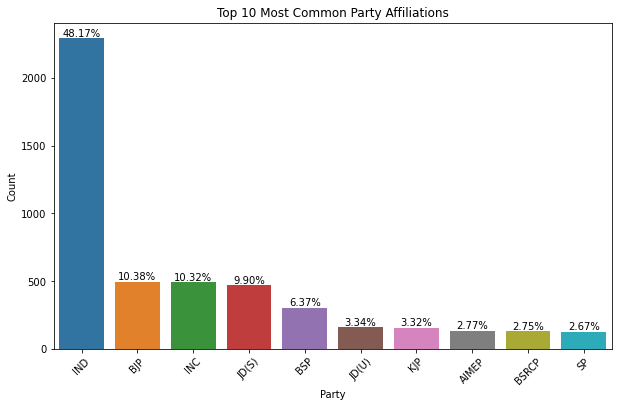

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most common party affiliations
top_10_parties = party_counts.head(10)

# Calculate the distribution percentage
total_count = top_10_parties.sum()
distribution_percentage = (top_10_parties / total_count) * 100

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_parties.index, y=top_10_parties.values)
plt.title('Top 10 Most Common Party Affiliations')
plt.xlabel('Party')
plt.ylabel('Count')

# Add percentage labels on the bars
for i, count in enumerate(top_10_parties):
    percentage = distribution_percentage[i]
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()




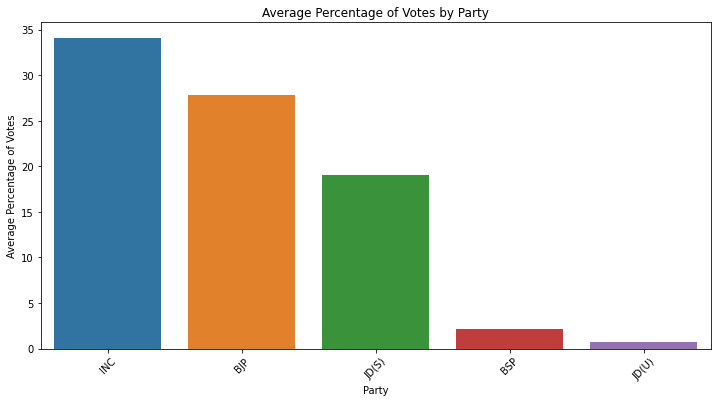

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average percentage of votes by party
party_vote_percentages = filtered_data.groupby('Party')['Percentage'].mean().reset_index()

# Sort the parties by average percentage of votes in descending order
party_vote_percentages = party_vote_percentages.sort_values('Percentage', ascending=False)

# Plot the average percentage of votes by party
plt.figure(figsize=(12, 6))
sns.barplot(data=party_vote_percentages, x='Party', y='Percentage')
plt.xlabel('Party')
plt.ylabel('Average Percentage of Votes')
plt.title('Average Percentage of Votes by Party')
plt.xticks(rotation=45)
plt.show()



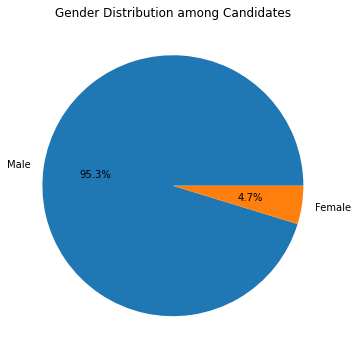

In [25]:
# Create a pie chart to visualize the gender distribution
gender_counts = filtered_data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution among Candidates')
plt.show()


In [26]:
# Calculate the average percentage of votes by party
party_vote_percentages = filtered_data.groupby('Party')['Percentage'].mean()

# Display the average percentage of votes for each party
print(party_vote_percentages)


Party
BJP      27.809732
BSP       2.127074
INC      34.090970
JD(S)    19.014424
JD(U)     0.713748
Name: Percentage, dtype: float64


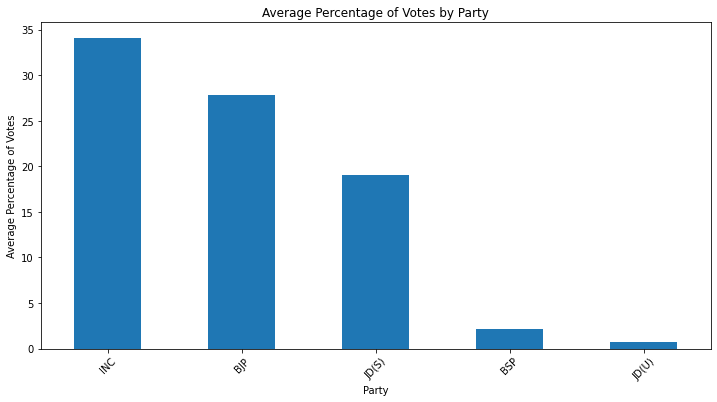

In [27]:



import matplotlib.pyplot as plt

# Calculate the average percentage of votes by party
party_vote_percentages = filtered_data.groupby('Party')['Percentage'].mean()

# Sort the parties by average percentage of votes in descending order
party_vote_percentages = party_vote_percentages.sort_values(ascending=False)

# Plot the average percentage of votes for each party
plt.figure(figsize=(12, 6))
party_vote_percentages.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Average Percentage of Votes')
plt.title('Average Percentage of Votes by Party')
plt.xticks(rotation=45)
plt.show()


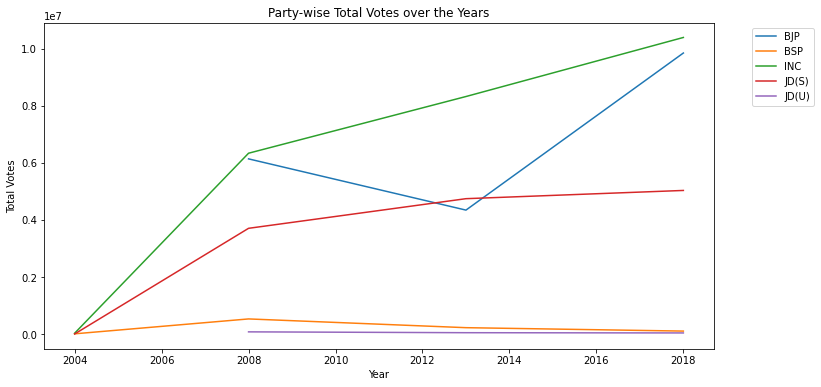

In [28]:
# Calculate the total votes received by each party over the years
party_total_votes = filtered_data.groupby(['Party', 'Year'])['Total Vote'].sum().reset_index()

# Create a line plot to visualize the party-wise total votes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=party_total_votes, x='Year', y='Total Vote', hue='Party')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Party-wise Total Votes over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


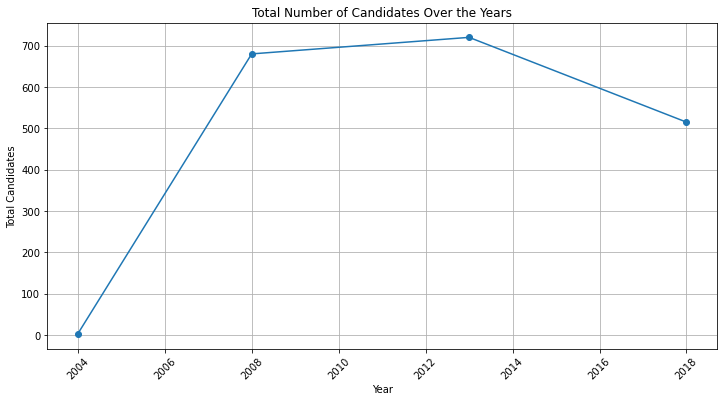

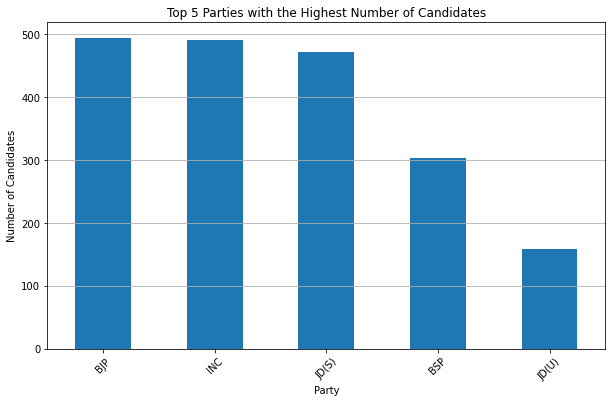

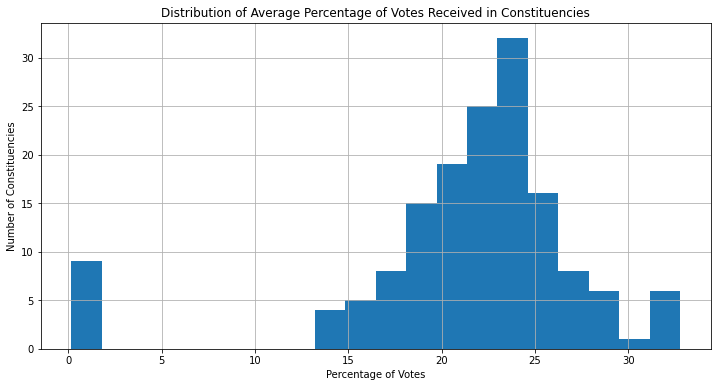

In [29]:
import matplotlib.pyplot as plt

# Step 3: Perform further analysis and visualization

# Group the data by year and calculate the total number of candidates in each year
yearly_counts = filtered_data.groupby('Year')['Candidate'].count()

# Plot the total number of candidates over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Candidates')
plt.title('Total Number of Candidates Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Group the data by party and calculate the total number of candidates from each party
party_counts = filtered_data.groupby('Party')['Candidate'].count()

# Plot the top 10 parties with the highest number of candidates
top_10_parties = party_counts.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_parties.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.title('Top 5 Parties with the Highest Number of Candidates')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the data by constituency and calculate the average percentage of votes received in each constituency
constituency_votes = filtered_data.groupby('Constituency')['Percentage'].mean()

# Plot the average percentage of votes received in each constituency
plt.figure(figsize=(12, 6))
constituency_votes.plot(kind='hist', bins=20)
plt.xlabel('Percentage of Votes')
plt.ylabel('Number of Constituencies')
plt.title('Distribution of Average Percentage of Votes Received in Constituencies')
plt.grid(True)
plt.show()


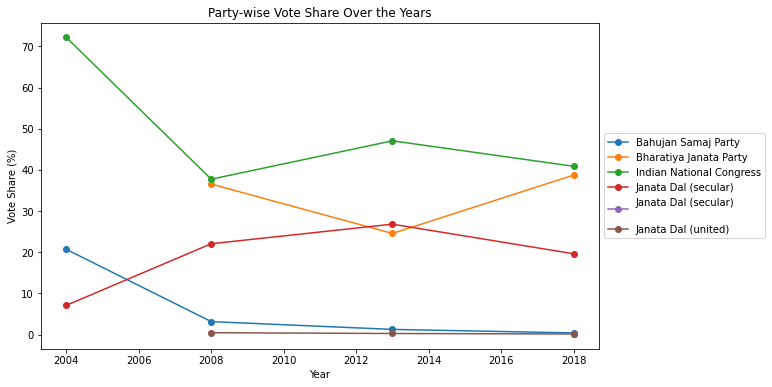

In [30]:


# Step 2: Calculate party-wise vote share
party_vote_share = filtered_data.groupby(['Year', 'Party Name'])['Total Vote'].sum()
party_vote_share = party_vote_share.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Step 3: Plot party-wise vote share
party_vote_share.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.title('Party-wise Vote Share Over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


               Total Vote                             Percentage             
                      sum          mean     max   min       mean    max   min
Constituency                                                                 
bellary           1643408  29880.145455   82546    94  22.326727  56.23  0.08
uttara kannada    1614843  28330.578947   83172   572  20.896140  50.14  0.46
dharwad           1416575  27775.980392   85123   232  20.711569  58.37  0.17
Madhugiri          825534  34397.250000   88521   197  23.523333  53.31  0.13
koppal             802406  33433.583333   98783   359  23.305417  54.64  0.26
haveri             792956  31718.240000   91721   253  21.620800  54.98  0.17
Bangalore          694354  57862.833333  152427   335  23.255833  47.74  0.13
Chamundeshwari     513899  51389.900000  121325  8308  27.786000  53.62  4.69
Hosakote           496798  45163.454545   98824   474  27.022727  51.23  0.28
Srinivaspur        489340  40778.333333   93571   303  24.395833

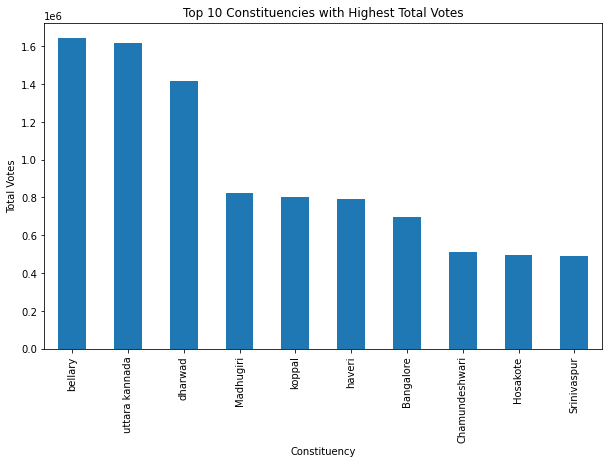

In [31]:



# Step 2: Calculate constituency-wise statistics
constituency_stats = filtered_data.groupby('Constituency').agg({
    'Total Vote': ['sum', 'mean', 'max', 'min'],
    'Percentage': ['mean', 'max', 'min']
})

# Step 3: Sort the statistics based on total votes
constituency_stats_sorted = constituency_stats.sort_values(('Total Vote', 'sum'), ascending=False)

# Step 4: Print the top 10 constituencies with highest total votes
top_10_constituencies = constituency_stats_sorted.head(10)
print(top_10_constituencies)

# Step 5: Plot a bar chart of total votes for the top 10 constituencies
top_10_constituencies.plot(kind='bar', y=('Total Vote', 'sum'), legend=False, figsize=(10, 6))
plt.xlabel('Constituency')
plt.ylabel('Total Votes')
plt.title('Top 10 Constituencies with Highest Total Votes')
plt.show()


            Total Vote                            Percentage               
                   sum          mean     max  min       mean    max     min
District                                                                   
Belgaum        5116714  29922.304094  102237  213  19.882671  68.44  0.0090
bijapur        2582899  28698.877778   98339  297  22.023778  57.29  0.2200
gulbarga       2518316  28295.685393   80668  235  22.090337  55.57  0.2100
Mandya         2514124  35916.057143  112396  188  22.395286  63.48  0.1100
Hassan         2482879  34484.430556  108541  209  23.085000  60.13  0.1600
Davangere      2424265  27238.932584   88101  174  14.501049  72.12  0.0020
tumkur         2387567  33160.652778   88521  197  22.177778  53.31  0.1300
Mysore         2320760  33634.202899  121325  148  23.316667  54.56  0.1200
Chitradurga    2255050  30067.333333  107976  203  10.084592  43.78  0.0011
Bagalkot       2246505  32092.928571   85653  238  19.604370  54.86  0.0021


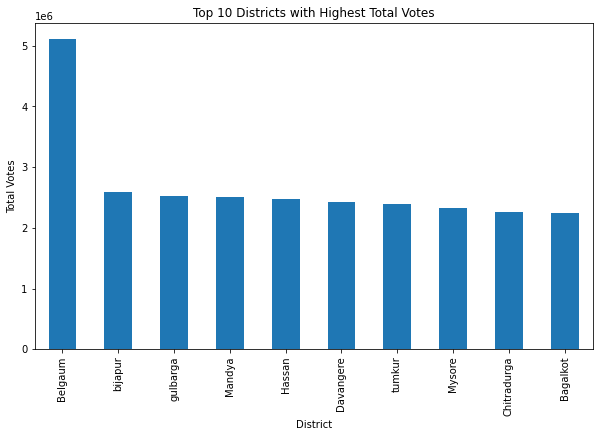

In [32]:


# Step 2: Calculate district-wise statistics
district_stats = filtered_data.groupby('District').agg({
    'Total Vote': ['sum', 'mean', 'max', 'min'],
    'Percentage': ['mean', 'max', 'min']
})

# Step 3: Sort the statistics based on total votes
district_stats_sorted = district_stats.sort_values(('Total Vote', 'sum'), ascending=False)

# Step 4: Print the top 10 districts with highest total votes
top_10_districts = district_stats_sorted.head(10)
print(top_10_districts)

# Step 5: Plot a bar chart of total votes for the top 10 districts
top_10_districts.plot(kind='bar', y=('Total Vote', 'sum'), legend=False, figsize=(10, 6))
plt.xlabel('District')
plt.ylabel('Total Votes')
plt.title('Top 10 Districts with Highest Total Votes')
plt.show()



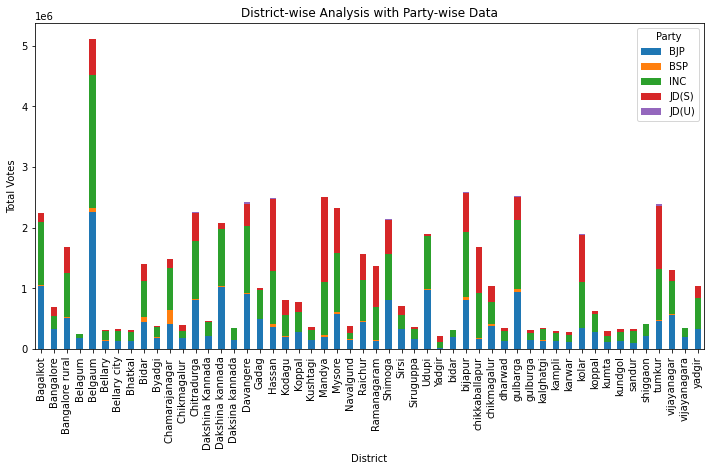

In [33]:
district_party_votes = filtered_data.groupby(['District', 'Party'])['Total Vote'].sum().reset_index()
district_wise_analysis = district_party_votes.pivot(index='District', columns='Party', values='Total Vote')

district_wise_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('District')
plt.ylabel('Total Votes')
plt.title('District-wise Analysis with Party-wise Data')
plt.legend(title='Party')
plt.show()


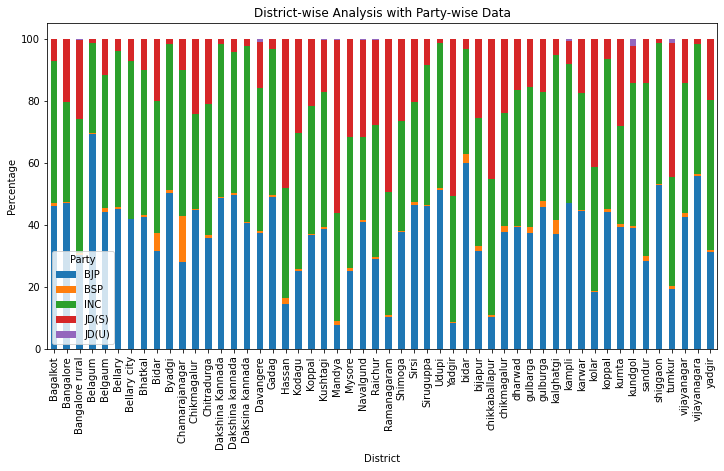

In [34]:
district_party_votes = filtered_data.groupby(['District', 'Party'])['Total Vote'].sum().reset_index()
district_total_votes = district_party_votes.groupby('District')['Total Vote'].sum().reset_index()
district_party_votes = district_party_votes.merge(district_total_votes, on='District', suffixes=('', '_Total'))
district_party_votes['Percentage'] = (district_party_votes['Total Vote'] / district_party_votes['Total Vote_Total']) * 100
district_wise_analysis = district_party_votes.pivot(index='District', columns='Party', values='Percentage')
district_wise_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('District')
plt.ylabel('Percentage')
plt.title('District-wise Analysis with Party-wise Data')
plt.legend(title='Party')
plt.show()


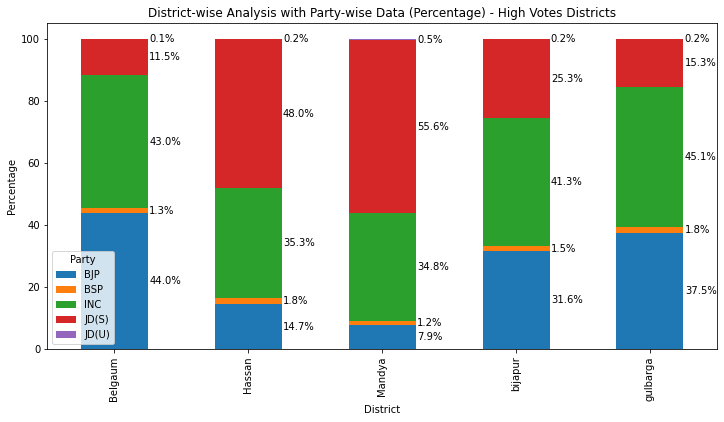

In [35]:
district_party_votes = filtered_data.groupby(['District', 'Party'])['Total Vote'].sum().reset_index()
district_total_votes = district_party_votes.groupby('District')['Total Vote'].sum().reset_index()
district_party_votes = district_party_votes.merge(district_total_votes, on='District', suffixes=('', '_Total'))
district_party_votes['Percentage'] = (district_party_votes['Total Vote'] / district_party_votes['Total Vote_Total']) * 100
high_votes_districts = district_total_votes.nlargest(5, 'Total Vote')['District'].tolist()
high_votes_data = district_party_votes[district_party_votes['District'].isin(high_votes_districts)]
district_wise_analysis = high_votes_data.pivot(index='District', columns='Party', values='Percentage')

# Plot a stacked bar chart to visualize the district-wise analysis with percentages for high votes districts
ax = district_wise_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add text annotations for the percentage distribution in the sidebar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width + 0.01, y + height / 2), ha='left', va='center')

plt.xlabel('District')
plt.ylabel('Percentage')
plt.title('District-wise Analysis with Party-wise Data (Percentage) - High Votes Districts')
plt.legend(title='Party')
plt.show()


In [36]:
import pandas as pd

# Assuming you have your dataset stored in 'data' DataFrame

# Convert 'Total Vote' column to numeric data type
data['Total Vote'] = pd.to_numeric(data['Total Vote'], errors='coerce')

# Group the data by year and constituency and find the candidate with the highest votes
grouped_data = data.groupby(['Year', 'Constituency']).apply(lambda x: x.loc[x['Total Vote'].idxmax()]).reset_index(drop=True)

# Sort the data in descending order of total votes
sorted_data = grouped_data.sort_values(by=['Year', 'Total Vote'], ascending=[True, False])

# Reset the index of the sorted data
sorted_data.reset_index(drop=True, inplace=True)

# Create a column 'Result' with values 'Win' for the candidate with the highest votes, and 'Loss' for others
sorted_data['Result'] = 'Loss'
sorted_data.loc[sorted_data.groupby('Year')['Total Vote'].idxmax(), 'Result'] = 'Win'

# Print the resulting DataFrame
print(sorted_data)




                         Candidate  Gender    Age Caste Party  \
0                   T Venkatareddy    Male  43 yr   GEN   IND   
1           Narsingrao Suryawanshi    Male  56 yr    SC   INC   
2                      Abdul Azeez    Male  44 yr   GEN   IND   
3                  B S Yeddyurappa    Male  65 yr   GEN   BJP   
4          Es En Krishnaiah Shetty    Male  49 yr   GEN   BJP   
..                             ...     ...    ...   ...   ...   
449              N Y Gopalakrishna    Male  68 yr    ST   BJP   
450        Siddu Bhimappa Nyamgoud    Male  69 yr   GEN   INC   
451  Somanagouda B Patil (sasanur)    Male  53 yr   GEN   BJP   
452  Koujalagi Mahantesh Shivanand    Male  47 yr   GEN   INC   
453     Dr Anjali Hemant Nimbalkar  Female  41 yr   GEN   INC   

                   Party Name  Total Vote Percentage  Year   Constituency  \
0                 Independent          87      0.06%   203      Madhugiri   
1    Indian National Congress       29186     28.49%  2004       

In [37]:
# Group the data by year and constituency and find the candidate with the highest votes
grouped_data = data.groupby(['Year', 'Constituency']).apply(lambda x: x.loc[x['Total Vote'].idxmax()]).reset_index(drop=True)

# Sort the data in descending order of total votes
sorted_data = grouped_data.sort_values(by=['Year', 'Total Vote'], ascending=[True, False])

# Reset the index of the sorted data
sorted_data.reset_index(drop=True, inplace=True)

# Create a column 'Result' with values 'Win' for the candidate with the highest votes, and 'Loss' for others
sorted_data['Result'] = 'Loss'
sorted_data.loc[sorted_data.groupby('Year')['Total Vote'].idxmax(), 'Result'] = 'Win'

# Print the resulting DataFrame
print(sorted_data)


                         Candidate  Gender    Age Caste Party  \
0                   T Venkatareddy    Male  43 yr   GEN   IND   
1           Narsingrao Suryawanshi    Male  56 yr    SC   INC   
2                      Abdul Azeez    Male  44 yr   GEN   IND   
3                  B S Yeddyurappa    Male  65 yr   GEN   BJP   
4          Es En Krishnaiah Shetty    Male  49 yr   GEN   BJP   
..                             ...     ...    ...   ...   ...   
449              N Y Gopalakrishna    Male  68 yr    ST   BJP   
450        Siddu Bhimappa Nyamgoud    Male  69 yr   GEN   INC   
451  Somanagouda B Patil (sasanur)    Male  53 yr   GEN   BJP   
452  Koujalagi Mahantesh Shivanand    Male  47 yr   GEN   INC   
453     Dr Anjali Hemant Nimbalkar  Female  41 yr   GEN   INC   

                   Party Name  Total Vote Percentage  Year   Constituency  \
0                 Independent          87      0.06%   203      Madhugiri   
1    Indian National Congress       29186     28.49%  2004       

In [38]:
# Group the data by party and count the number of wins for each party
party_wins = sorted_data[sorted_data['Result'] == 'Win']['Party'].value_counts()

# Print the party-wise win counts
print(party_wins)


INC    2
BJP    2
IND    1
Name: Party, dtype: int64


In [39]:
# Sort the data in descending order of total votes
sorted_data_votes = sorted_data.sort_values(by='Total Vote', ascending=False)

# Print the candidates and their corresponding total votes
print(sorted_data_votes[['Candidate', 'Total Vote']])


                                        Candidate  Total Vote
300                                  M Krishnappa      152427
301                                D K Shivakumar      127552
302                                 G T Devegowda      121325
303                                   A Manjunath      119492
304                                 Suresh Gowdaa      112396
..                                            ...         ...
146                Dr Bagali Sarvabhoum Satagouda       29456
1                          Narsingrao Suryawanshi       29186
147  Appaji Channabasavaraj Shankararao Nadagouda       24065
2                                     Abdul Azeez         146
0                                  T Venkatareddy          87

[454 rows x 2 columns]


In [40]:
# Group the data by party and result, and count the occurrences
party_results = sorted_data.groupby(['Party', 'Result']).size().unstack()

# Fill any missing values with 0
party_results.fillna(0, inplace=True)

# Calculate the total wins and losses for each party
party_results['Total Wins'] = party_results['Win']
party_results['Total Losses'] = party_results['Loss']

print(party_results)


Result   Loss  Win  Total Wins  Total Losses
Party                                       
BJP     163.0  2.0         2.0         163.0
BSP       1.0  0.0         0.0           1.0
BSRCP     3.0  0.0         0.0           3.0
INC     179.0  2.0         2.0         179.0
IND      15.0  1.0         1.0          15.0
JD(S)    80.0  0.0         0.0          80.0
KJP       5.0  0.0         0.0           5.0
KMP       1.0  0.0         0.0           1.0
SKP       1.0  0.0         0.0           1.0
SP        1.0  0.0         0.0           1.0


In [41]:
# Group the data by year and count the number of wins in each year
year_wins = sorted_data[sorted_data['Result'] == 'Win']['Year'].value_counts().sort_index()

# Print the year-wise win counts
print(year_wins)


203     1
2004    1
2008    1
2013    1
2018    1
Name: Year, dtype: int64


In [42]:
# Calculate the win percentage for each party
party_results['Win Percentage'] = (party_results['Total Wins'] / (party_results['Total Wins'] + party_results['Total Losses'])) * 100

print(party_results)


Result   Loss  Win  Total Wins  Total Losses  Win Percentage
Party                                                       
BJP     163.0  2.0         2.0         163.0        1.212121
BSP       1.0  0.0         0.0           1.0        0.000000
BSRCP     3.0  0.0         0.0           3.0        0.000000
INC     179.0  2.0         2.0         179.0        1.104972
IND      15.0  1.0         1.0          15.0        6.250000
JD(S)    80.0  0.0         0.0          80.0        0.000000
KJP       5.0  0.0         0.0           5.0        0.000000
KMP       1.0  0.0         0.0           1.0        0.000000
SKP       1.0  0.0         0.0           1.0        0.000000
SP        1.0  0.0         0.0           1.0        0.000000


In [43]:
# Group the data by candidate and count the number of wins for each candidate
candidate_wins = sorted_data[sorted_data['Result'] == 'Win']['Candidate'].value_counts()

# Print the candidate-wise win counts
print(candidate_wins)


T Venkatareddy             1
Narsingrao Suryawanshi     1
B S Yeddyurappa            1
Prakash Babanna Hukkeri    1
M Krishnappa               1
Name: Candidate, dtype: int64


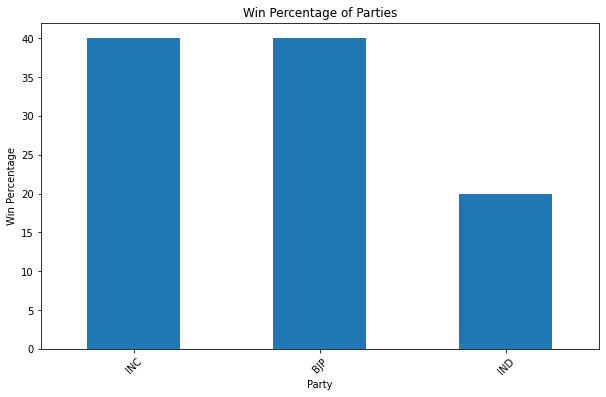

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'sorted_data' DataFrame with 'Party' and 'Result' columns

# Group the data by party and count the number of wins for each party
party_wins = sorted_data[sorted_data['Result'] == 'Win']['Party'].value_counts()

# Calculate the win percentages for each party
party_win_percentages = (party_wins / party_wins.sum()) * 100

# Sort the party win percentages in descending order
party_results_sorted = party_win_percentages.sort_values(ascending=False)

# Filter out parties with zero win percentage
party_results_sorted_filtered = party_results_sorted[party_results_sorted > 0]

# Plot the win percentages of parties (excluding parties with zero win percentage)
plt.figure(figsize=(10, 6))
party_results_sorted_filtered.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Parties')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Step 1: Calculate the number of seats won by each party in the past elections (excluding IND)
party_seat_count = data[data['Party'] != 'IND']['Party'].value_counts()

# Step 2: Determine the party with the highest number of seats
predicted_winner = party_seat_count.idxmax()

# Step 3: Display the predicted winner
print("Predicted Winner (excluding IND):", predicted_winner)

Predicted Winner (excluding IND): BJP


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'sorted_data' DataFrame with 'Result' column indicating winners and losers

# Calculate the frequency of wins for each party
win_counts = sorted_data[sorted_data['Result'] == 'Win']['Party'].value_counts()

# Calculate the percentage of wins for each party
win_percentages = win_counts / len(sorted_data[sorted_data['Result'] == 'Win']) * 100

# Sort the parties based on win percentages in descending order
win_percentages_sorted = win_percentages.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
win_percentages_sorted.plot(kind='bar')
plt.title('Winning Party Analysis')
plt.xlabel('Party')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()


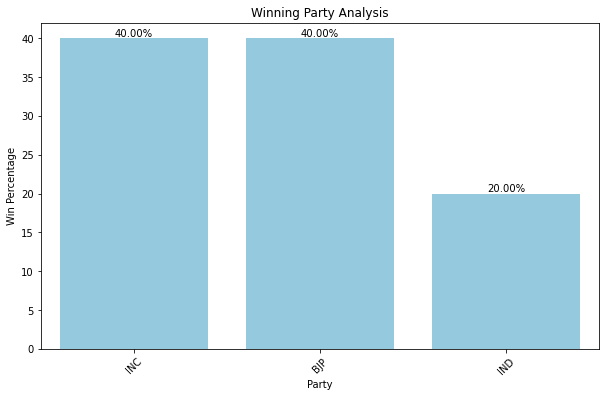

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'sorted_data' DataFrame with 'Result' column indicating winners and losers

# Calculate the frequency of wins for each party
win_counts = sorted_data[sorted_data['Result'] == 'Win']['Party'].value_counts()

# Calculate the percentage of wins for each party
win_percentages = win_counts / len(sorted_data[sorted_data['Result'] == 'Win']) * 100

# Sort the parties based on win percentages in descending order
win_percentages_sorted = win_percentages.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=win_percentages_sorted.index, y=win_percentages_sorted.values, color='skyblue')

# Add the win percentage labels inside each bar
for i, v in enumerate(win_percentages_sorted.values):
    ax.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

plt.title('Winning Party Analysis')
plt.xlabel('Party')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()


In [51]:
import os

file_path = os.path.abspath('constituency_results.csv')
print('File stored at:', file_path)


File stored at: C:\Users\A\constituency_results.csv


In [53]:



# Group the data by election year and political party
grouped_results = data.groupby(['Year', 'Party']).sum()

# Compute the total number of seats won by each party in each election year
yearly_totals = grouped_results.groupby('Party').sum()

# Sum the total number of seats won by each party across all election years
total_seats = yearly_totals.sum(axis=1)

# Identify the party with the highest total number of seats won
most_successful_party = total_seats.idxmax()

print("The party that has regularly won the most seats in elections is:", most_successful_party)

The party that has regularly won the most seats in elections is: INC


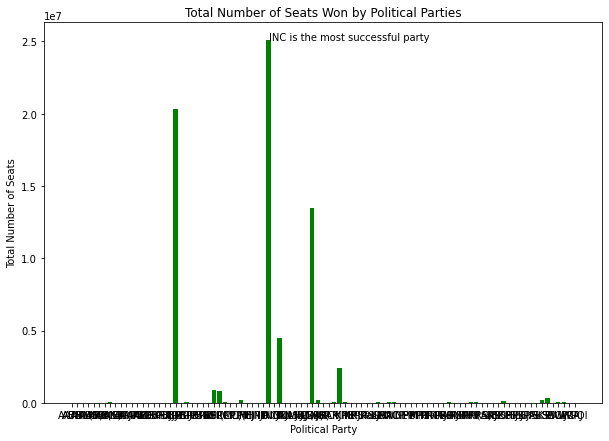

In [60]:


# Group the data by election year and political party
grouped_results =data.groupby(['Year', 'Party']).sum()

# Compute the total number of seats won by each party in each election year
yearly_totals = grouped_results.groupby('Party').sum()

# Sum the total number of seats won by each party across all election years
total_seats = yearly_totals.sum(axis=1)

# Create a bar plot of the total number of seats won by each party
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(total_seats.index, total_seats.values, color='green')
ax.set_title('Total Number of Seats Won by Political Parties')
ax.set_xlabel('Political Party')
ax.set_ylabel('Total Number of Seats')

# Identify the party with the highest total number of seats won
most_successful_party = total_seats.idxmax()
ax.text(most_successful_party, total_seats[most_successful_party], f"{most_successful_party} is the most successful party")

plt.show()


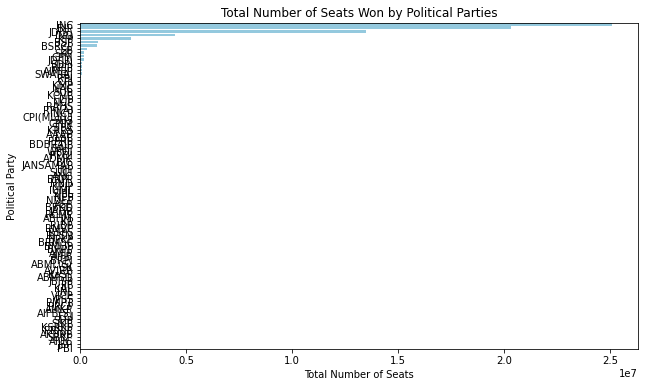

INC is the most successful party


In [61]:
import seaborn as sns



# Group the data by election year and political party
grouped_results = data.groupby(['Year', 'Party']).sum()

# Compute the total number of seats won by each party in each election year
yearly_totals = grouped_results.groupby('Party').sum()

# Sum the total number of seats won by each party across all election years
total_seats = yearly_totals.sum(axis=1).reset_index(name='Total Seats')

# Sort the parties by the total number of seats won
total_seats_sorted = total_seats.sort_values('Total Seats', ascending=False)

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Seats', y='Party', data=total_seats_sorted, color='skyblue')
plt.title('Total Number of Seats Won by Political Parties')
plt.xlabel('Total Number of Seats')
plt.ylabel('Political Party')
plt.show()

# Identify the party with the highest total number of seats won
most_successful_party = total_seats_sorted.iloc[0]['Party']
print(f"{most_successful_party} is the most successful party")


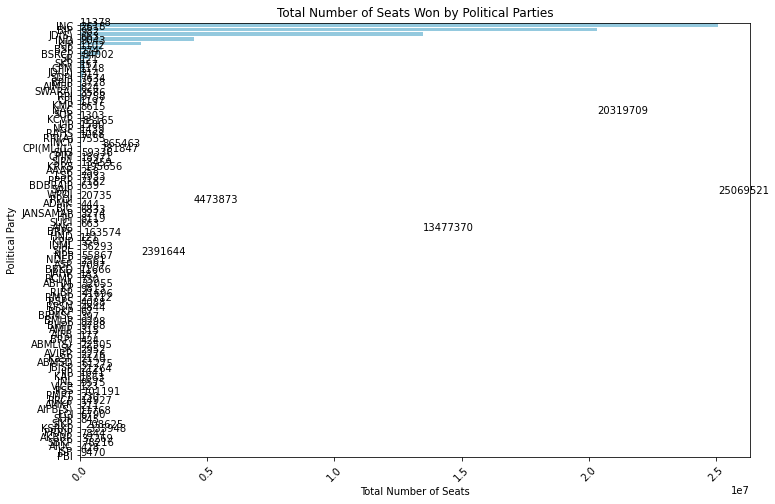

INC is the most successful party


In [62]:


# Group the data by election year and political party
grouped_results =data.groupby(['Year', 'Party']).sum()

# Compute the total number of seats won by each party in each election year
yearly_totals = grouped_results.groupby('Party').sum()

# Sum the total number of seats won by each party across all election years
total_seats = yearly_totals.sum(axis=1).reset_index(name='Total Seats')

# Sort the parties by the total number of seats won
total_seats_sorted = total_seats.sort_values('Total Seats', ascending=False)

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Seats', y='Party', data=total_seats_sorted, color='skyblue')
plt.title('Total Number of Seats Won by Political Parties')
plt.xlabel('Total Number of Seats')
plt.ylabel('Political Party')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the value of each bar
for index, row in total_seats_sorted.iterrows():
    plt.text(x=row['Total Seats'] + 5, y=index, s=str(row['Total Seats']))

plt.show()

# Identify the party with the highest total number of seats won
most_successful_party = total_seats_sorted.iloc[0]['Party']
print(f"{most_successful_party} is the most successful party")


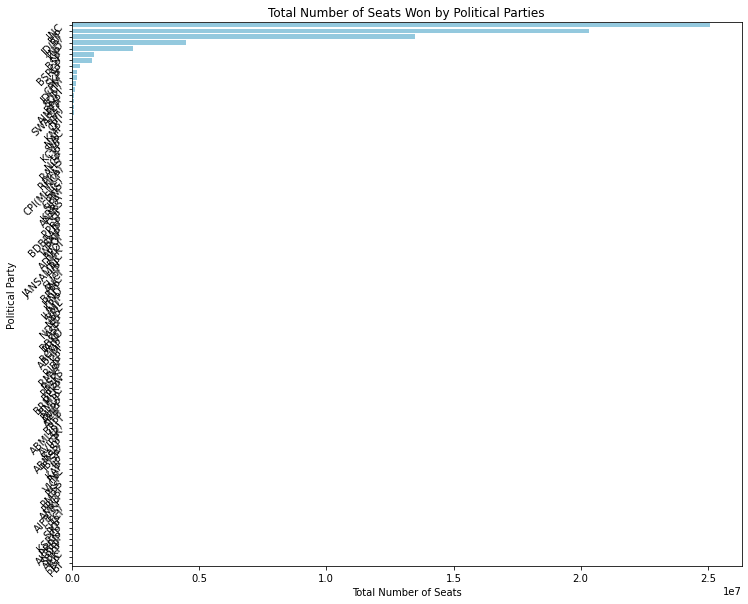

INC is the most successful party


In [63]:

# Group the data by election year and political party
grouped_results = data.groupby(['Year', 'Party']).sum()

# Compute the total number of seats won by each party in each election year
yearly_totals = grouped_results.groupby('Party').sum()

# Sum the total number of seats won by each party across all election years
total_seats = yearly_totals.sum(axis=1).reset_index(name='Total Seats')

# Sort the parties by the total number of seats won
total_seats_sorted = total_seats.sort_values('Total Seats', ascending=False)

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Total Seats', y='Party', data=total_seats_sorted, color='skyblue')
plt.title('Total Number of Seats Won by Political Parties')
plt.xlabel('Total Number of Seats')
plt.ylabel('Political Party')

# Rotate the y-axis labels by 45 degrees for readability
for label in ax.get_yticklabels():
    label.set_rotation(45)

plt.show()

# Identify the party with the highest total number of seats won
most_successful_party = total_seats_sorted.iloc[0]['Party']
print(f"{most_successful_party} is the most successful party")


In [64]:


# Group the data by election year and political party
grouped_results = data.groupby(['Year', 'Party']).sum()

# Compute the total number of seats won by each party in each election year
yearly_totals = grouped_results.groupby('Party').sum()

# Compute the vote share for each party in each election year
vote_shares = grouped_results.div(yearly_totals, level='Party') * 100

# Compute the change in vote share for each party between the last two elections
last_two_years = vote_shares.index.levels[0][-2:]
change = vote_shares.loc[last_two_years].groupby('Party').diff().iloc[-1]

# Sort the parties by the change in vote share, in ascending order
change_sorted = change.sort_values()

# Identify the party with the lowest margin but has seen the largest increase in vote share
target_party = change_sorted.index[0]
print(f"The party with the lowest margin but has seen the largest increase in vote share is {target_party}")


The party with the lowest margin but has seen the largest increase in vote share is Total Vote


In [66]:


# Filter the DataFrame to only include the most recent election
most_recent_year = data['Year'].max()
recent_results = data[data['Year'] == most_recent_year]

# Calculate the margin of victory for each political party
party_votes = recent_results.groupby('Party')['Total Vote'].sum()
margin = party_votes.max() - party_votes.drop(party_votes.idxmax()).max()

# Calculate the trend in total votes for each political party
previous_years = data[data['Year'] < most_recent_year]
previous_votes = previous_years.groupby(['Year', 'Party'])['Total Vote'].sum()
previous_average = previous_votes.groupby('Party').mean()
recent_votes = recent_results.groupby('Party')['Total Vote'].sum()
trend = recent_votes.mean() - previous_average.mean()

# Sort the parties by their margin of victory and trend in total votes
sorted_results = pd.DataFrame({'Margin': [margin], 'Trend': [trend]}).T.sort_values(by=[0], ascending=[True])

# Select the party with the lowest margin of victory but highest trend in total votes
low_margin_high_trend = sorted_results.index[0]
print(f"The party with the lowest margin of victory but highest trend in total votes is {low_margin_high_trend}")


The party with the lowest margin of victory but highest trend in total votes is Trend


In [69]:
# Filter the DataFrame to only include the most recent election
most_recent_year = data['Year'].max()
recent_results = data[data['Year'] == most_recent_year]

# Group the DataFrame by Party and calculate the sum of Total Seats won by each party
seats_won_by_party = recent_results.groupby('Party')['Total Vote'].sum()

# Print the result
print(seats_won_by_party)

Party
AAAP       11378
ABHM        1638
ABML(S)      188
ADMK        1527
AIFB         861
           ...  
SP          8187
SUCI        3559
SWARAJ     78216
VJCP         148
WPOI        1472
Name: Total Vote, Length: 73, dtype: int64
